# LSI31003 Machine Learning in Molecular Biology Assignment 1

In [25]:
from setup import *
import seaborn as sns
%matplotlib inline

##  Introduction <a id='section1'></a>

Here we will explore a somatic mutation data set from ["Alexandrov LB, et al. (2020) The repertoire of mutational signatures in human cancer. Nature"](https://www.nature.com/articles/s41586-020-1943-3). 

In [26]:
## ploting 96 mutational channels
col_set = ['#0343df','#000000','#e50000','#929591','#3f9b0b','#ff81c0']
col_list = []
for i in range (len(col_set)):
    col_list += [col_set[i]] * 16

def plot_mutationchannels(sig, name=""):
    sns.set(rc={"figure.figsize":(11,2.5)})
    sns.set(style="whitegrid", color_codes=True)

    plt.bar(sig.index, sig, width = 0.5, color = col_list)
    plt.xticks(rotation=90, size = 7, weight='bold')
    plt.title (name, size = 12, weight='bold')
    plt.tight_layout()
    plt.show()

### Load mutational catalogs from cancer whole genome sequenced data

Here we will use single base substitution (SBS) data of 2780 cancer genomes from PCAWG project in this assignment. First, let's load the data matrix from the local data folder.

In [27]:
somaticMutations = pd.read_csv ("./data/MutSigCancer/WGS_PCAWG.96.csv")
somaticMutations = somaticMutations.set_index (somaticMutations['Mutation type'] + "_" + somaticMutations['Trinucleotide'])

In [28]:
somaticMutations.head(2)

,Mutation type,Trinucleotide,Biliary-AdenoCA::SP117655,Biliary-AdenoCA::SP117556,Biliary-AdenoCA::SP117627,Biliary-AdenoCA::SP117775,Biliary-AdenoCA::SP117332,Biliary-AdenoCA::SP117712,Biliary-AdenoCA::SP117017,Biliary-AdenoCA::SP117031,...,Uterus-AdenoCA::SP94540,Uterus-AdenoCA::SP95222,Uterus-AdenoCA::SP89389,Uterus-AdenoCA::SP90503,Uterus-AdenoCA::SP92460,Uterus-AdenoCA::SP92931,Uterus-AdenoCA::SP91265,Uterus-AdenoCA::SP89909,Uterus-AdenoCA::SP90629,Uterus-AdenoCA::SP95550
C>A_ACA,C>A,ACA,269,114,105,217,52,192,54,196,...,117,233,94,114,257,139,404,97,250,170
C>A_ACC,C>A,ACC,148,56,71,123,36,139,54,102,...,90,167,59,64,268,75,255,78,188,137


Next we will use the above given function to visualize the data from an individual case:

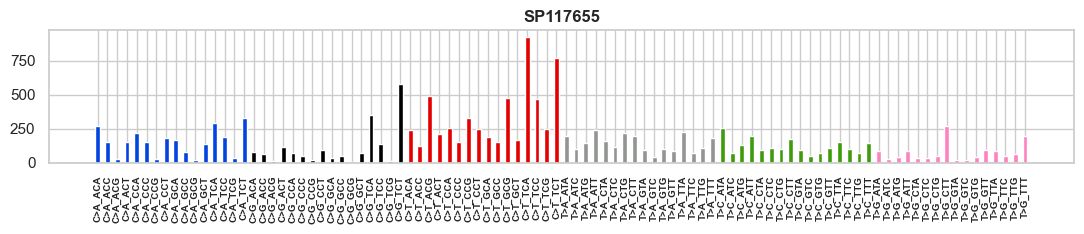

In [29]:
SP117655_profile = somaticMutations['Biliary-AdenoCA::SP117655']
plot_mutationchannels(SP117655_profile,"SP117655")

### Load mutational signatures from Alexandrov *et al.'s* paper

There are 65 SBS signatures have been reported based on the paper.

In [30]:
SBS_sig = pd.read_csv("./data/MutSigCancer/SBS_signatures.csv")
SBS_sig = SBS_sig.set_index (SBS_sig['Type'] + "_" + SBS_sig['SubType'])
SBS_sig.head(2)

,Type,SubType,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,...,SBS51,SBS52,SBS53,SBS54,SBS55,SBS56,SBS57,SBS58,SBS59,SBS60
C>A_ACA,C>A,ACA,0.000886,5.800000e-07,0.0208,0.0422,0.01200,0.000425,0.000067,0.002330,...,0.14100,0.01520,0.00538,0.002160,0.00588,0.0126,0.01230,0.05890,0.00359,0.006150
C>A_ACC,C>A,ACC,0.002280,1.480000e-04,0.0165,0.0333,0.00944,0.000524,0.000179,0.000461,...,0.00169,0.00654,0.00196,0.000796,0.00205,0.0157,0.00143,0.00675,0.00237,0.000779


Here is an example of showing the spectrum of the fourth signature, which is found associated with tobacco consuming in lung cancers.

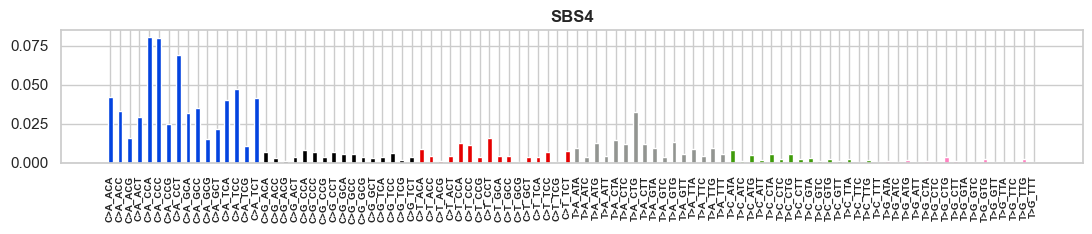

In [31]:
name = 'SBS4'
sig = SBS_sig[name]
plot_mutationchannels(sig, name)

In [32]:
channels6 = list(set(list(SBS_sig['Type'].values)))
channels6

['C>G', 'T>A', 'C>A', 'T>C', 'T>G', 'C>T']

### Problem 1: Explore the data in various ways by visualisation as well as by summary statistics <a id='Problem1'></a>

#### Problem 1a: 
Using the data matrix somaticMutations make a summary plot of total number of mutations per sample per cancer type, see for reference Figure 1 (the top panel) in Alexandrov et al.'s paper. 

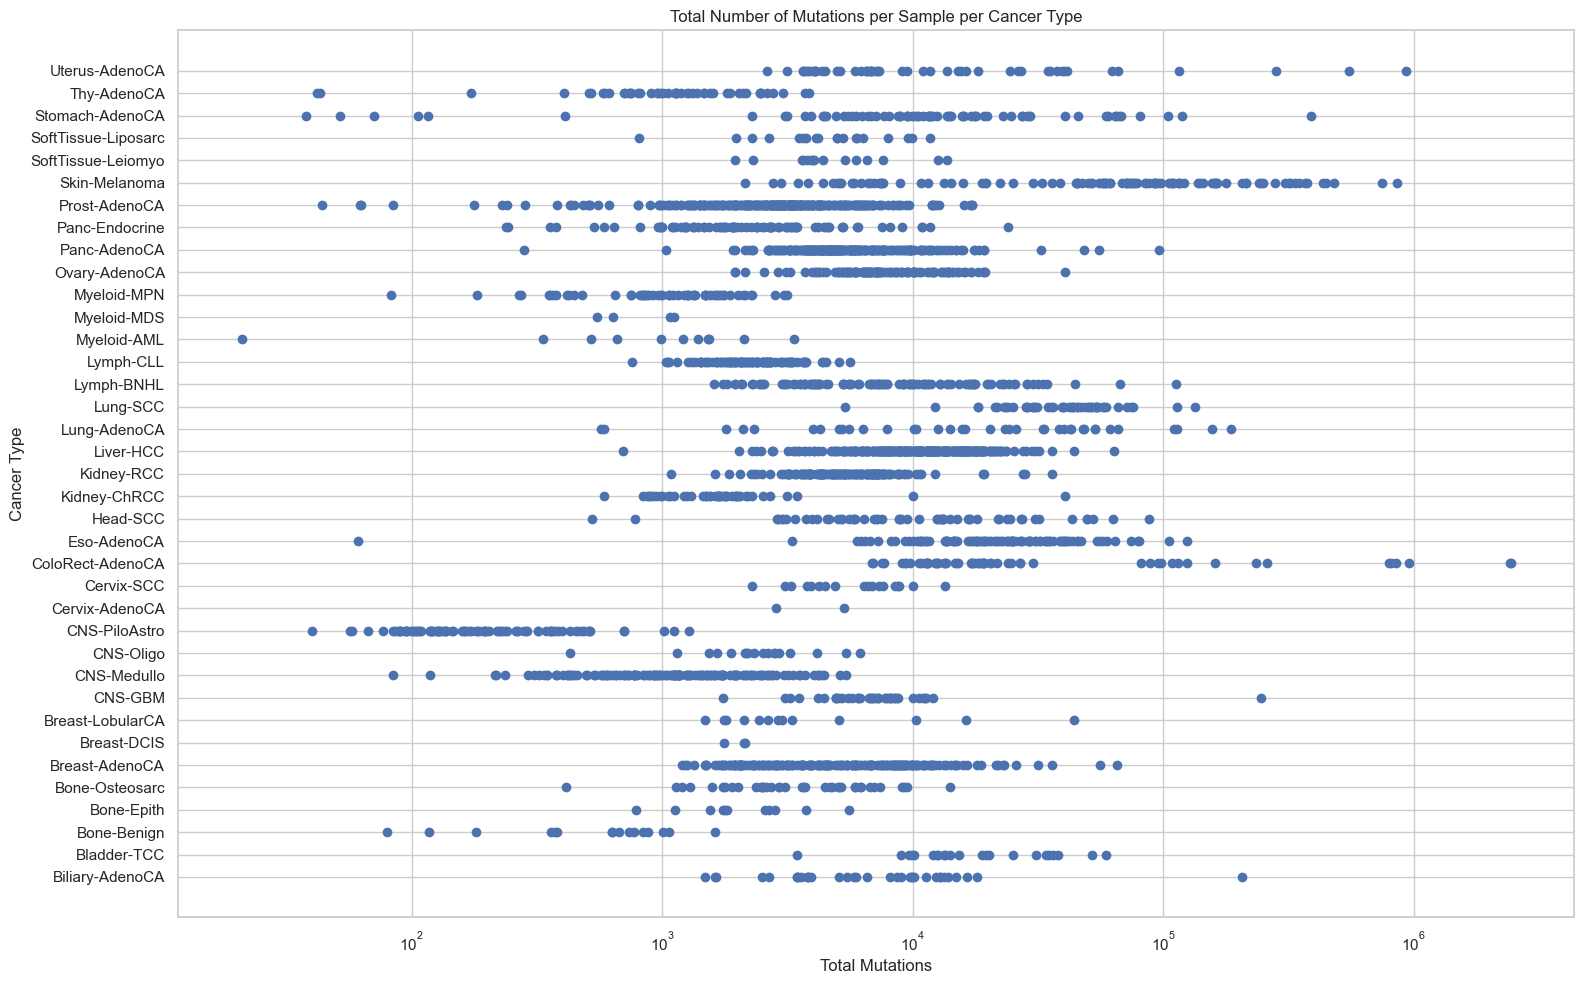

In [101]:
sum_per_sample = somaticMutations.iloc[:,2:].sum()
sum_per_sample.index=sum_per_sample.index.str.split("::").str.get(0)

plt.figure(figsize=(16, 10))
plt.scatter(list(sum_per_sample),list(sum_per_sample.index))
plt.title('Total Number of Mutations per Sample per Cancer Type')
plt.xlabel('Total Mutations')
plt.xscale("log")
plt.ylabel('Cancer Type')
plt.tight_layout()

#### Problem 1b: 
Visualise the mutational signatures. The data is in variable SBS_sig.

We have given one example in the beginning. More references could be found in mutational signature database ["COSMIC: Signatures of Mutational Processes in Human Cancer"](https://cancer.sanger.ac.uk/cosmic/signatures/SBS/). You could also write your own code and visualize all signatures using it.

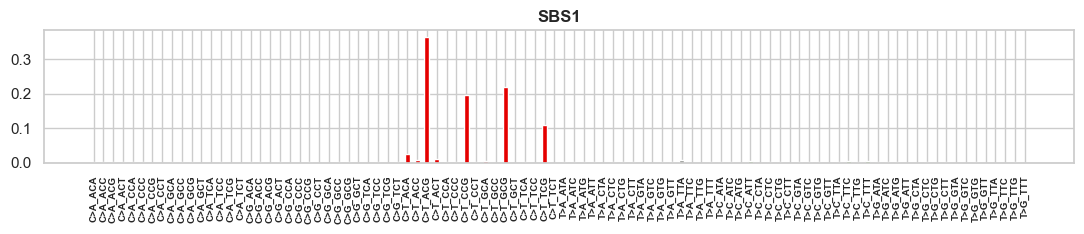

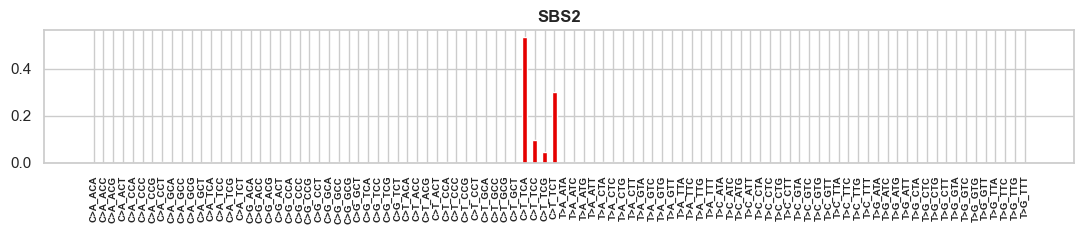

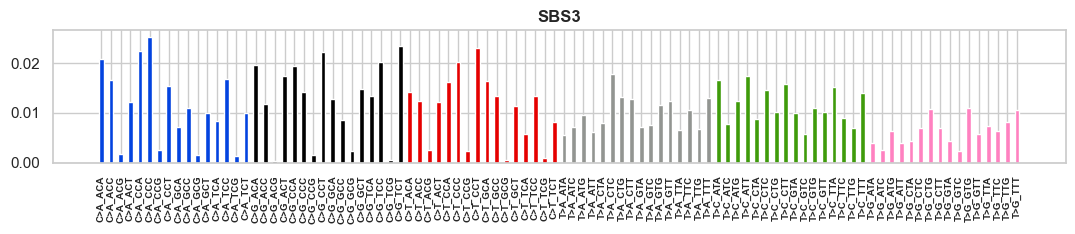

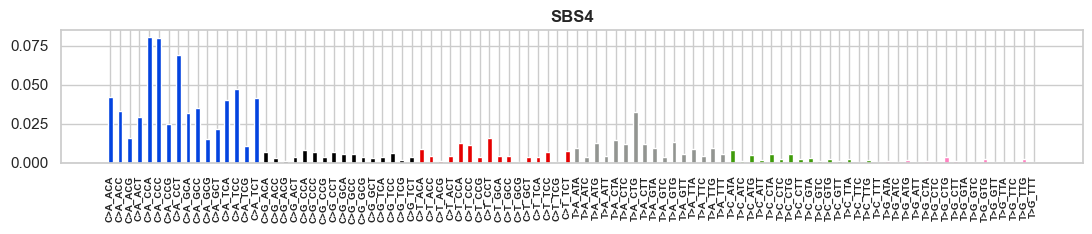

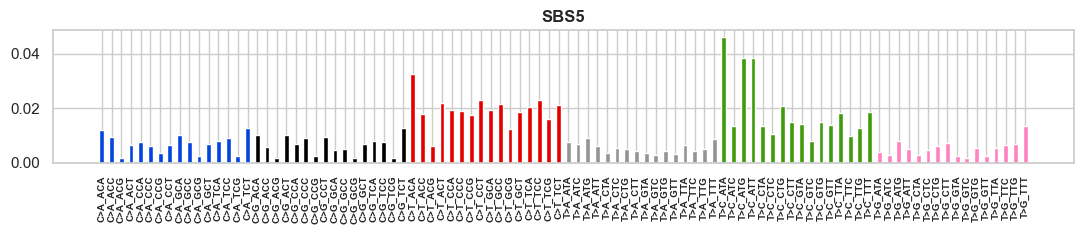

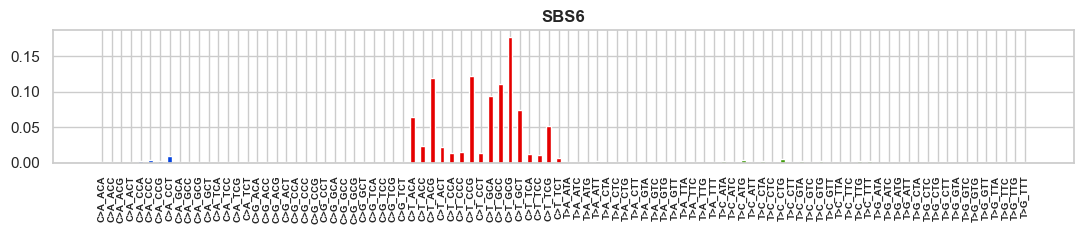

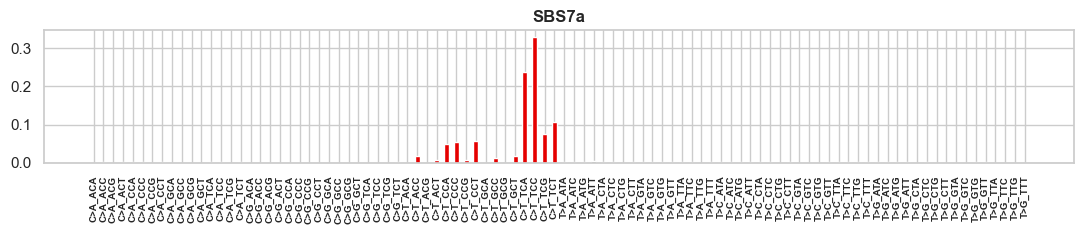

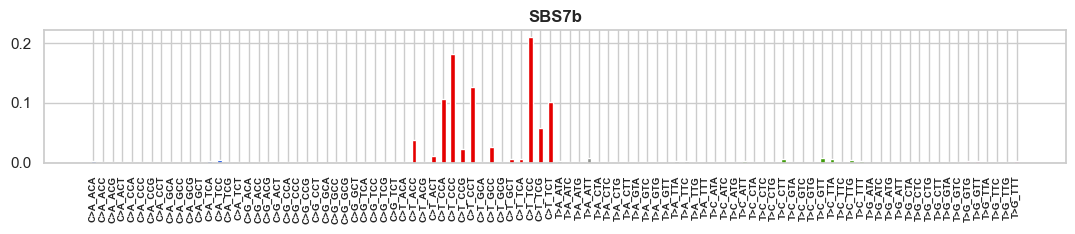

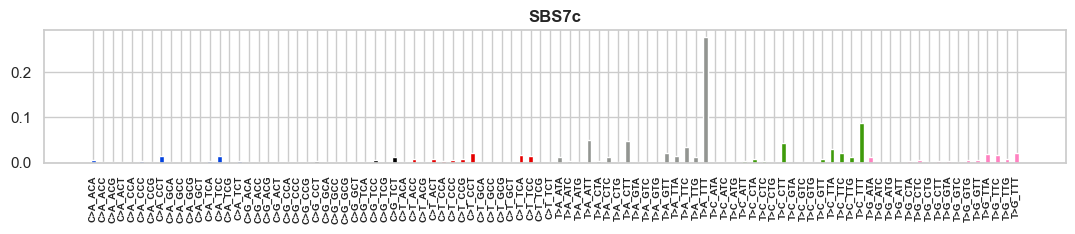

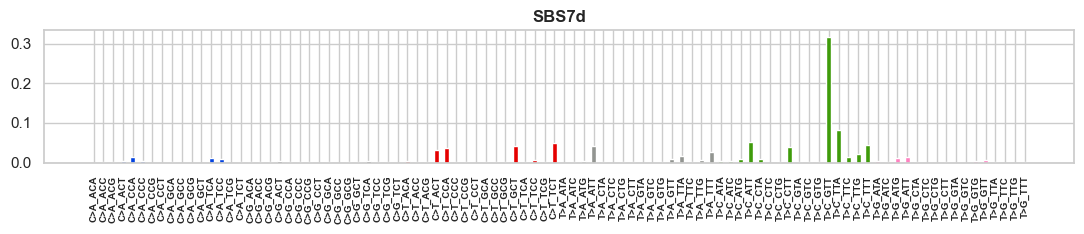

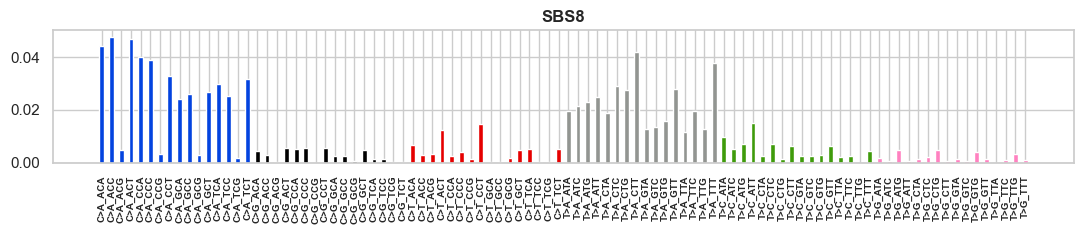

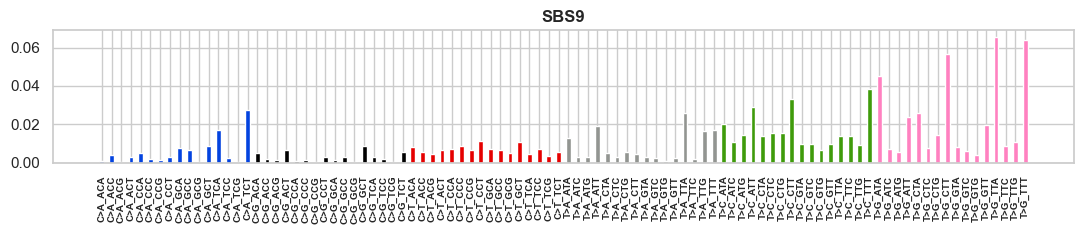

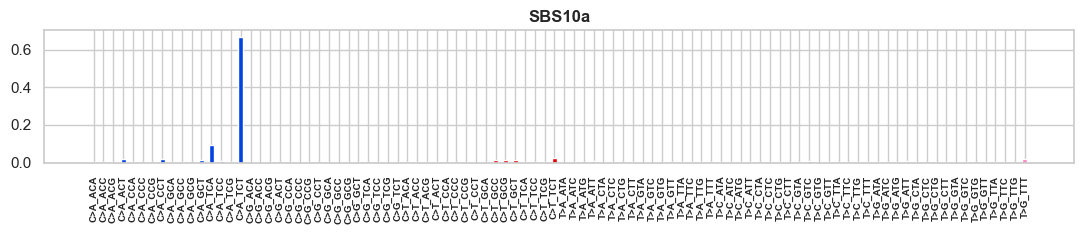

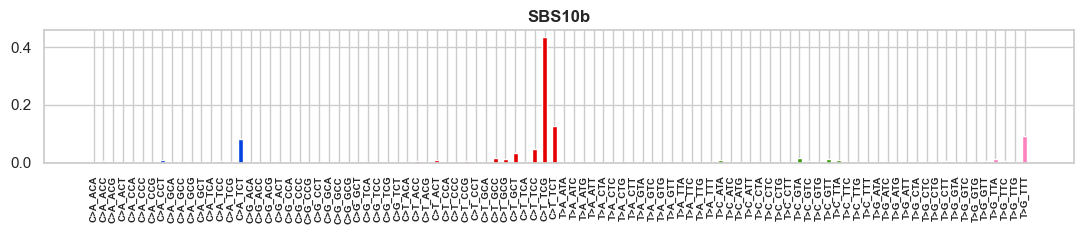

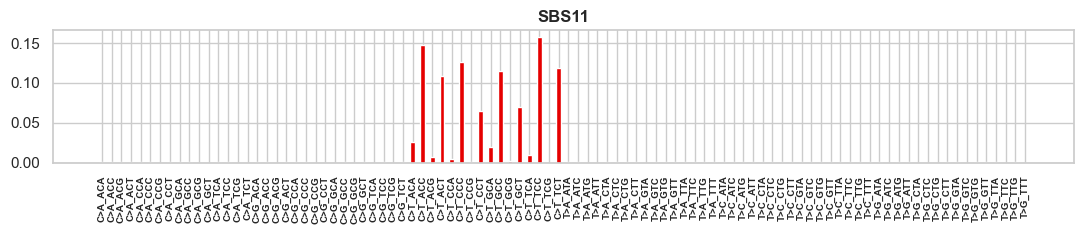

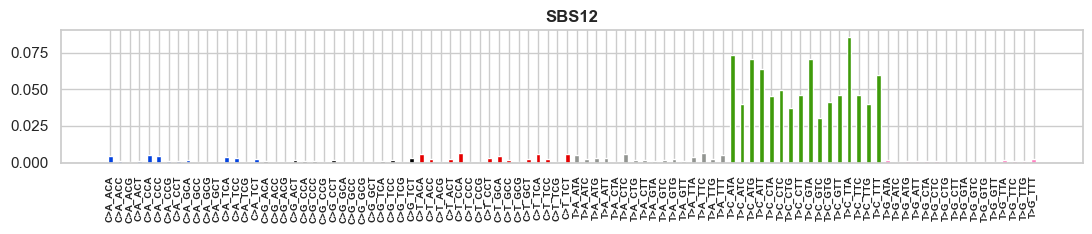

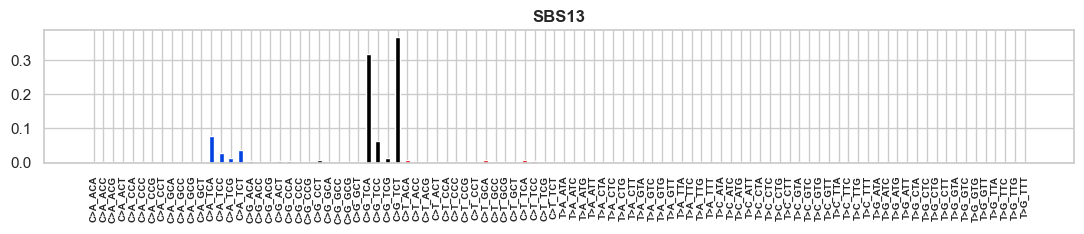

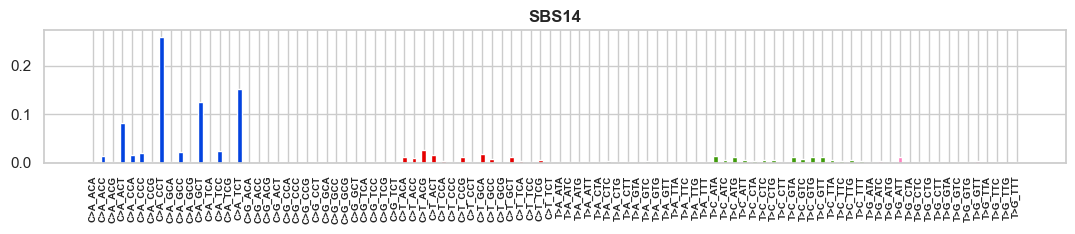

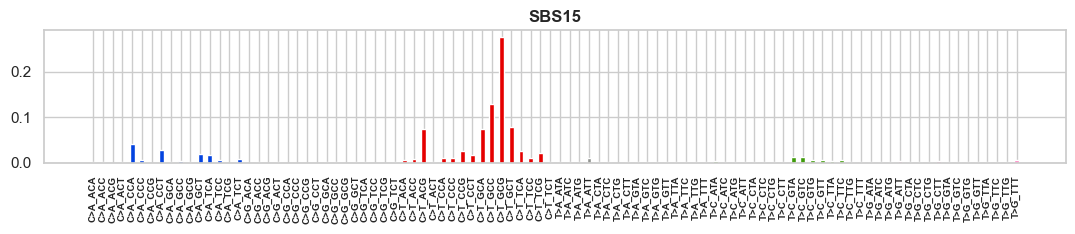

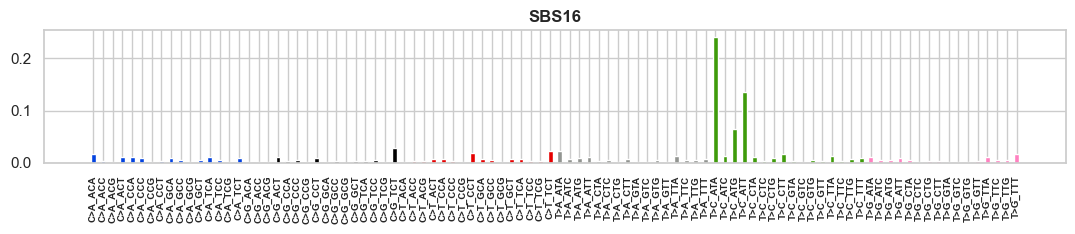

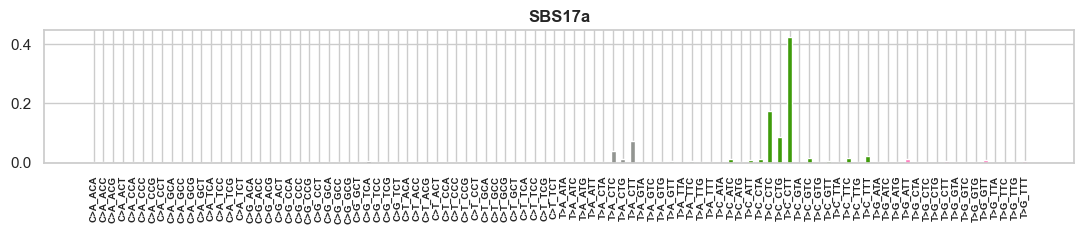

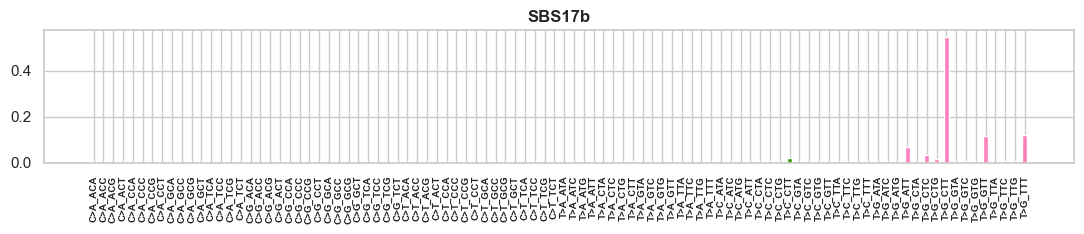

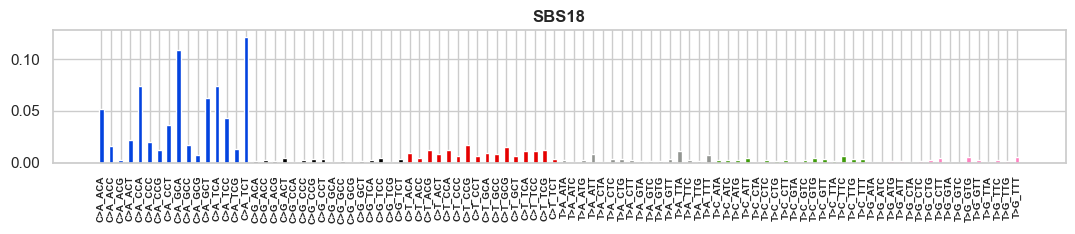

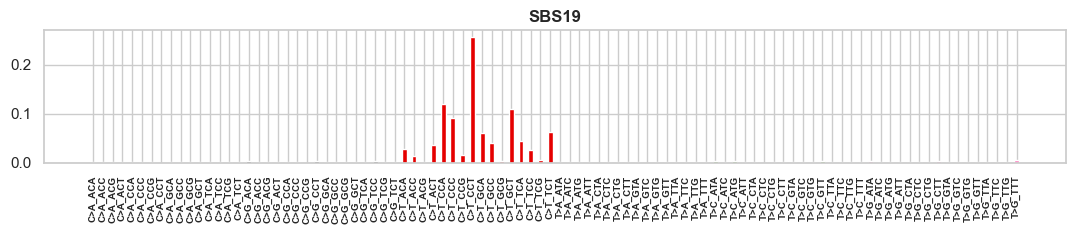

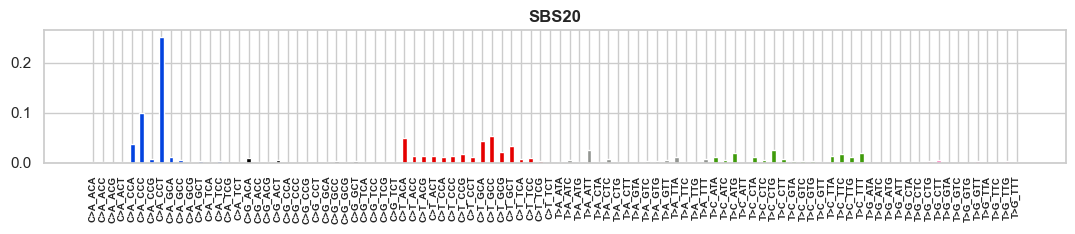

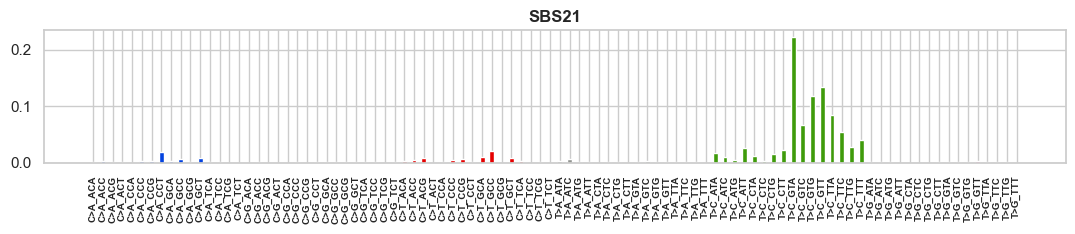

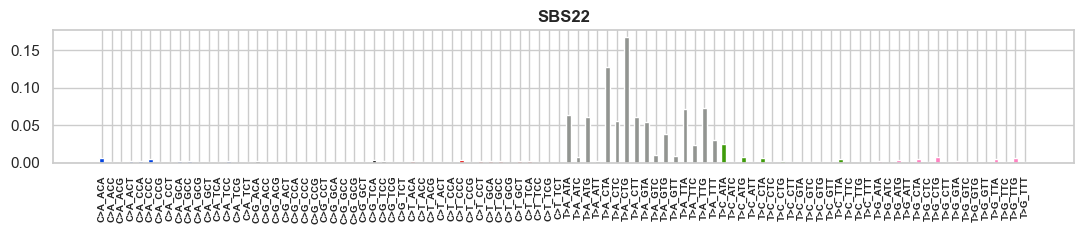

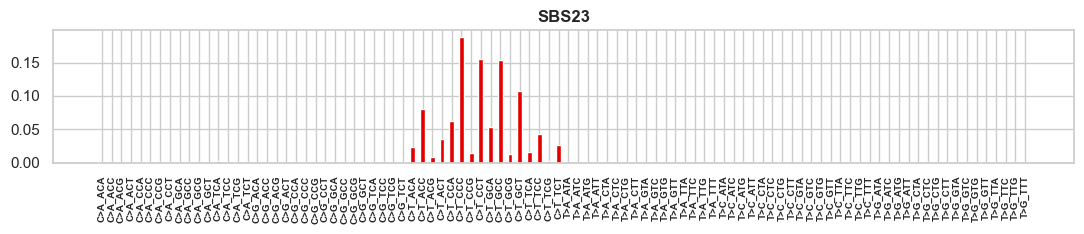

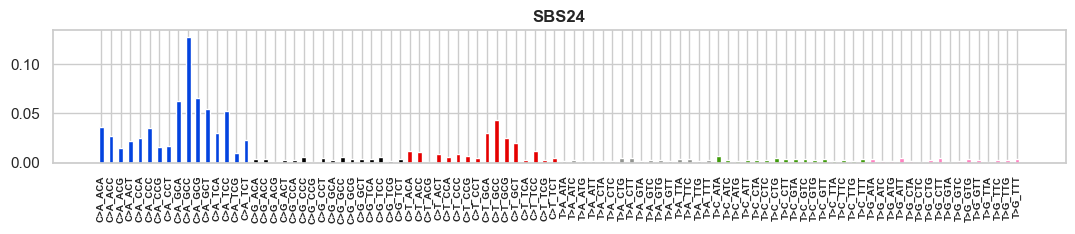

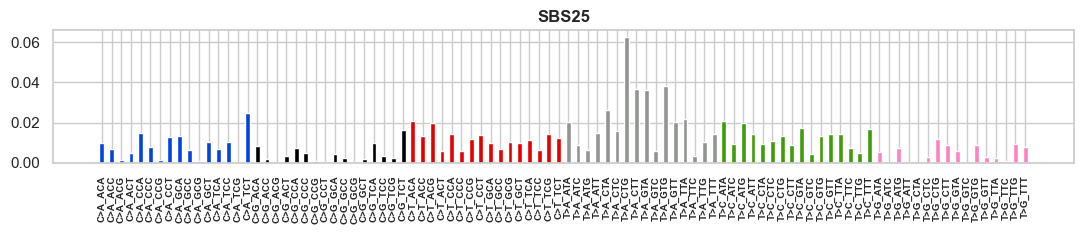

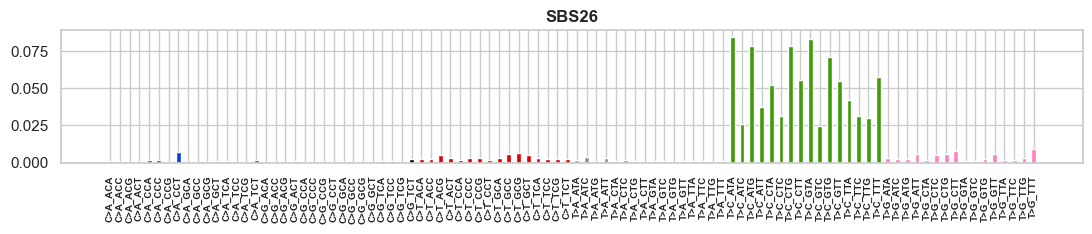

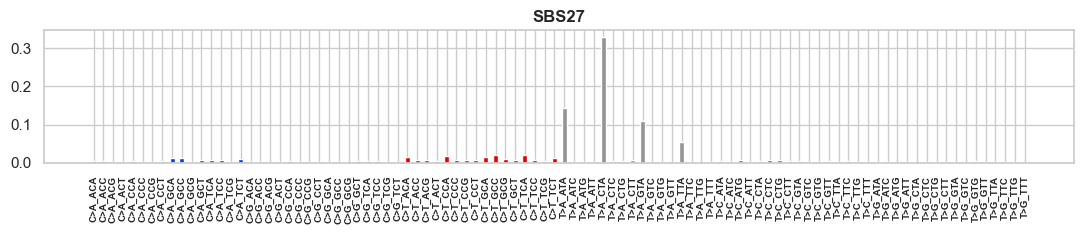

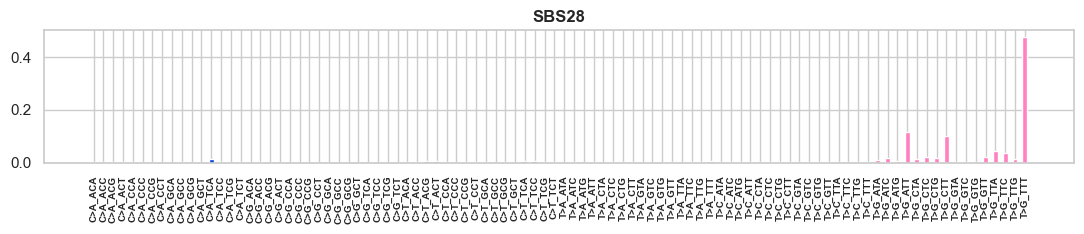

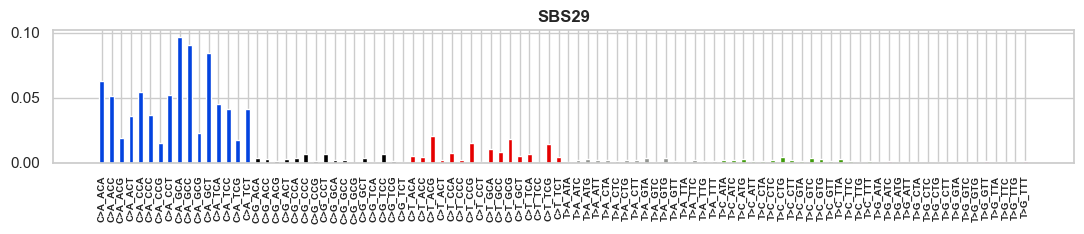

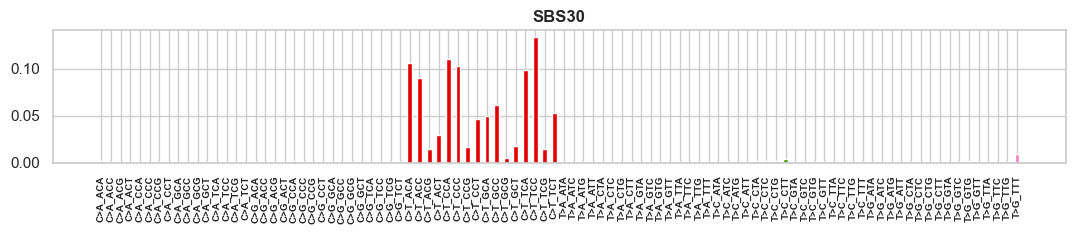

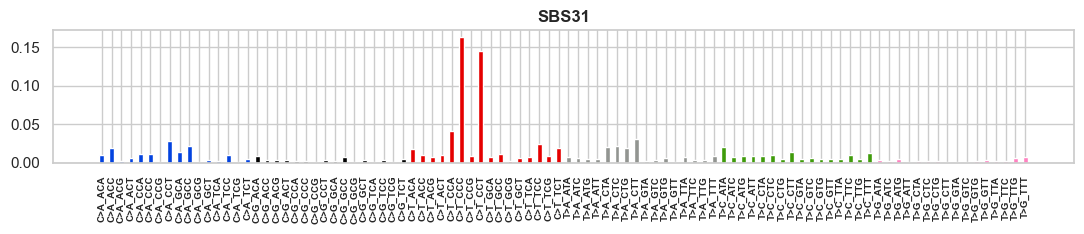

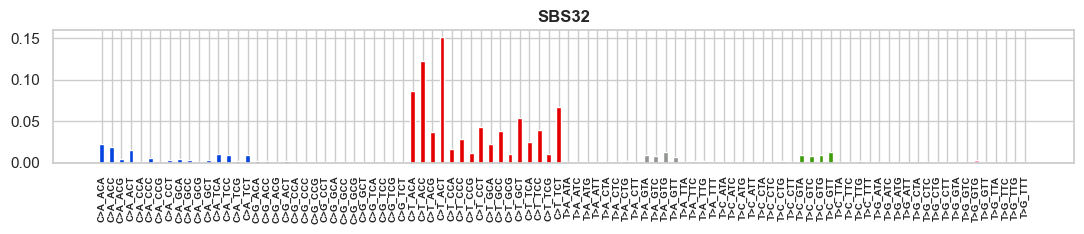

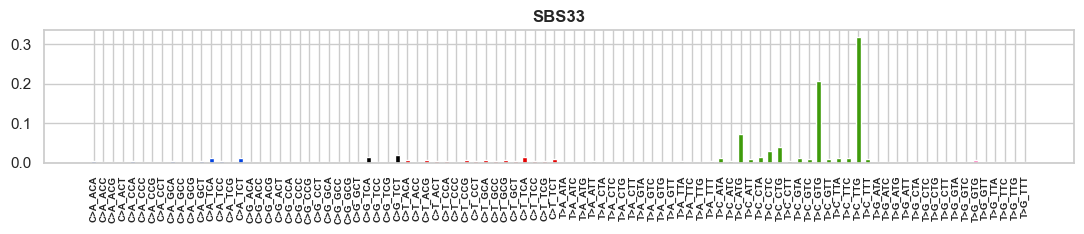

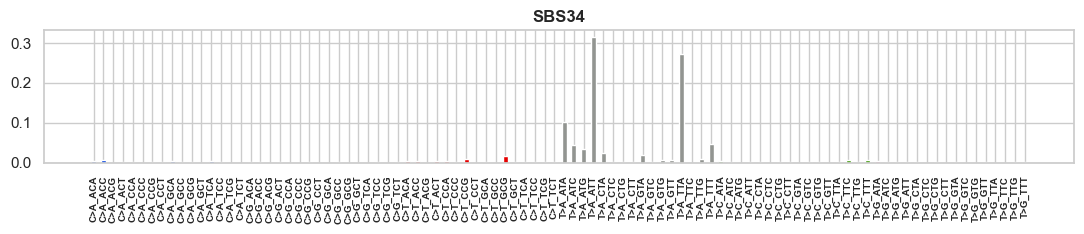

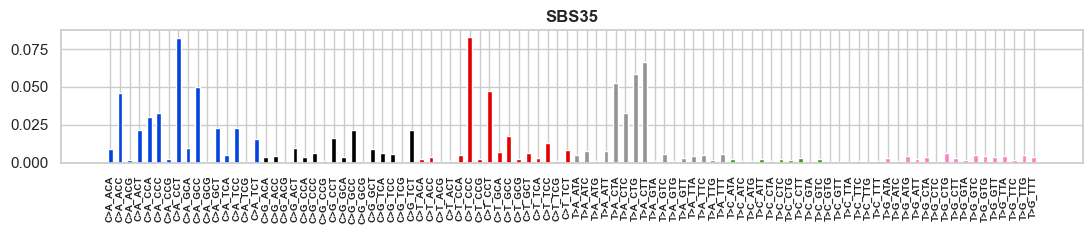

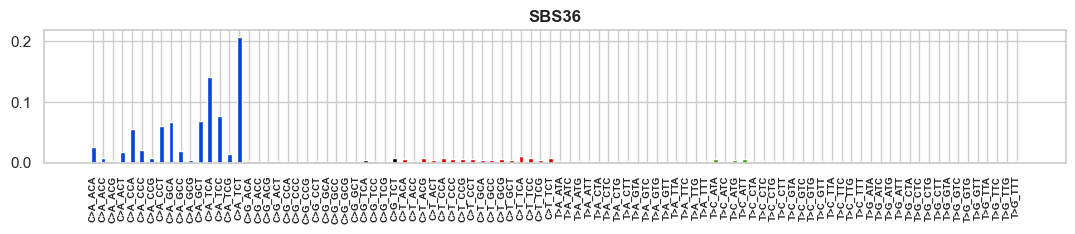

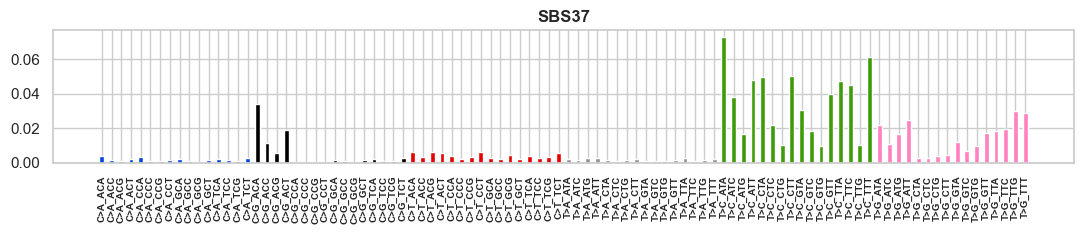

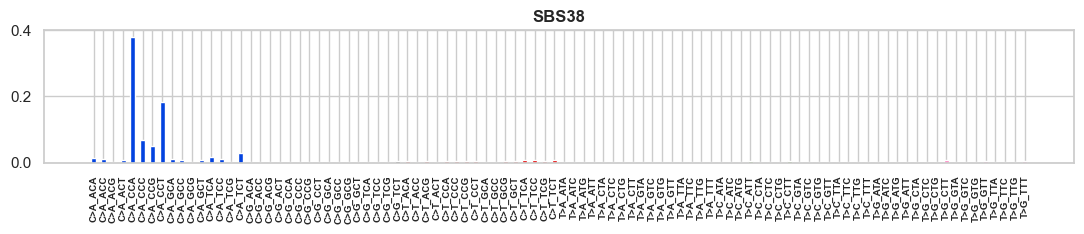

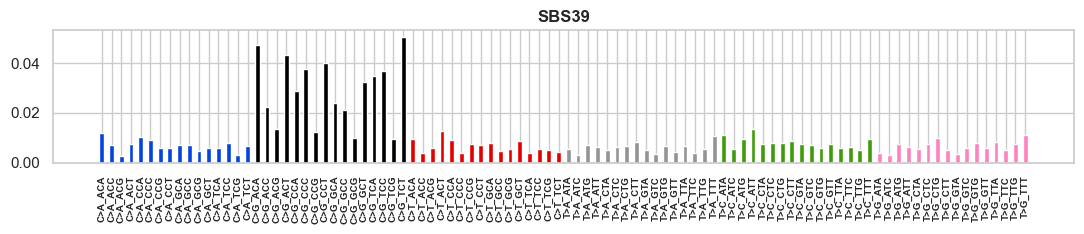

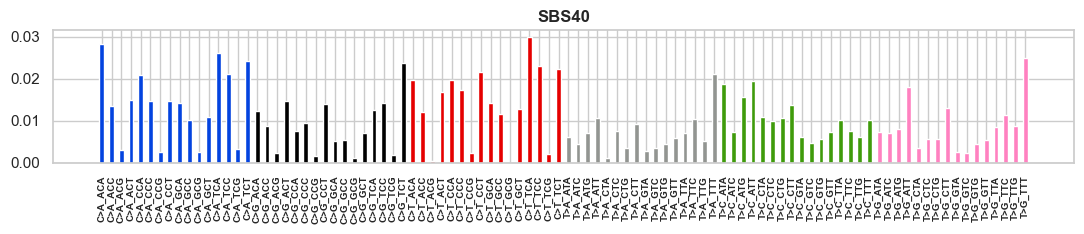

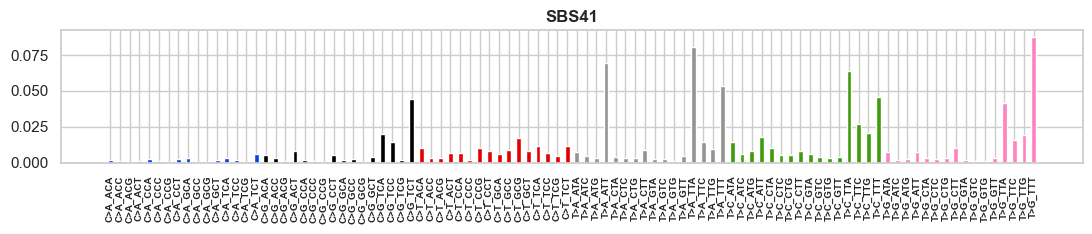

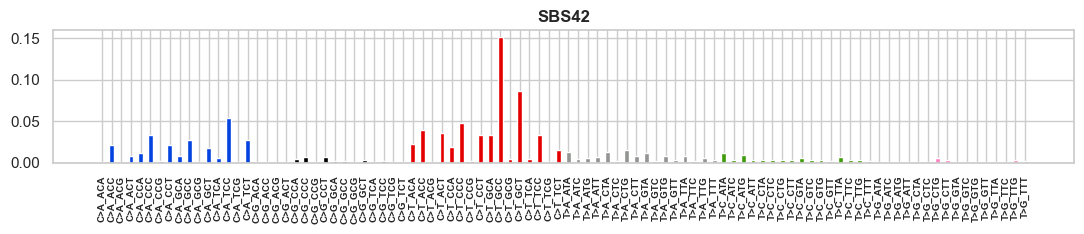

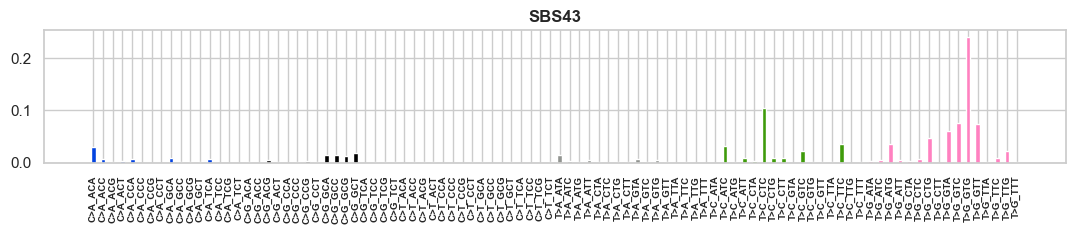

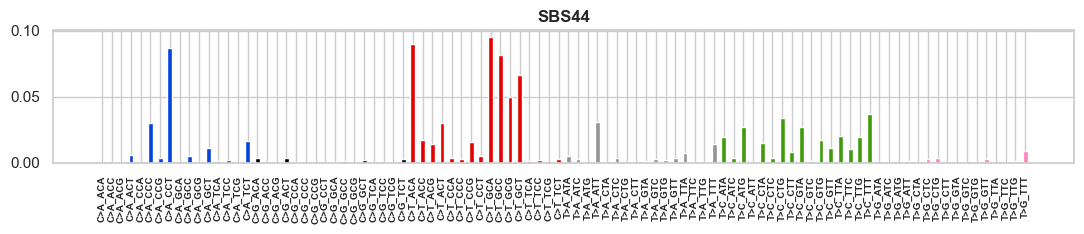

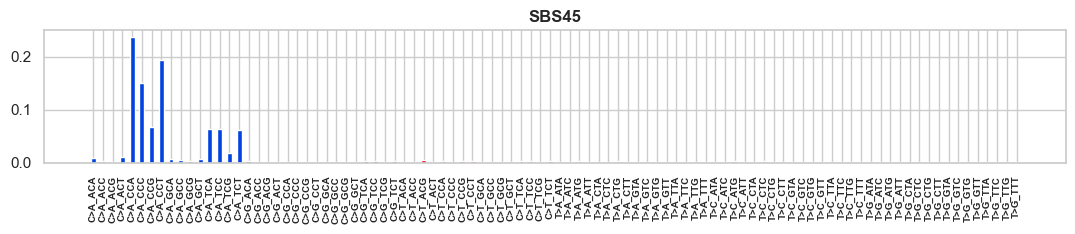

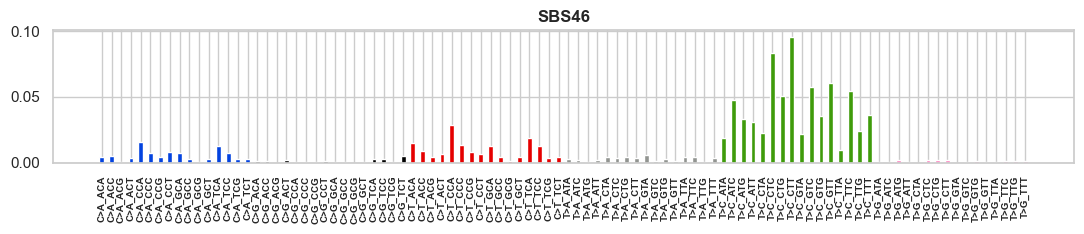

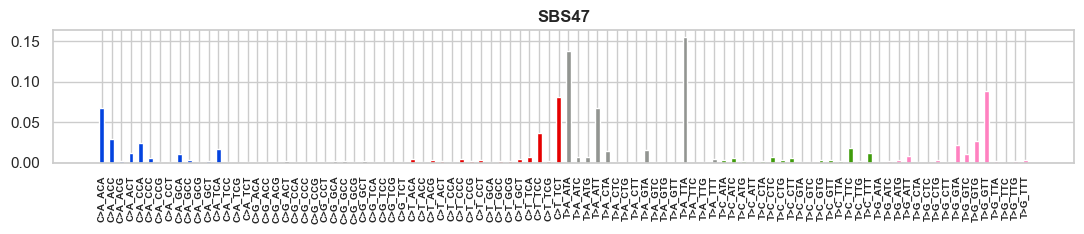

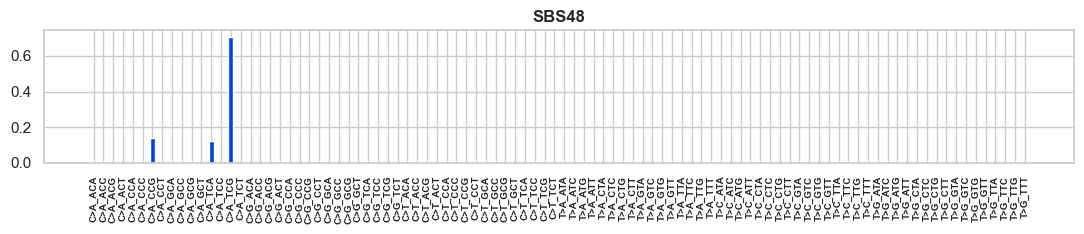

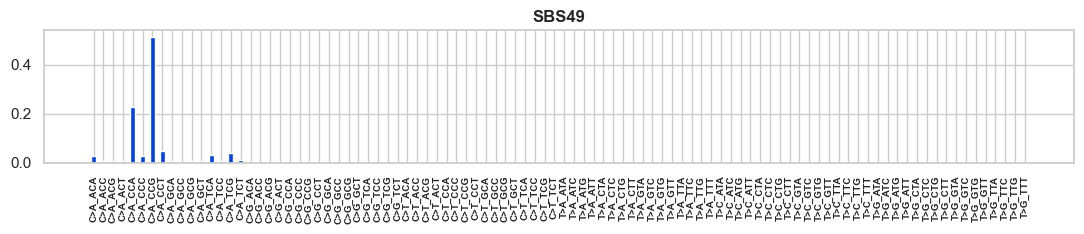

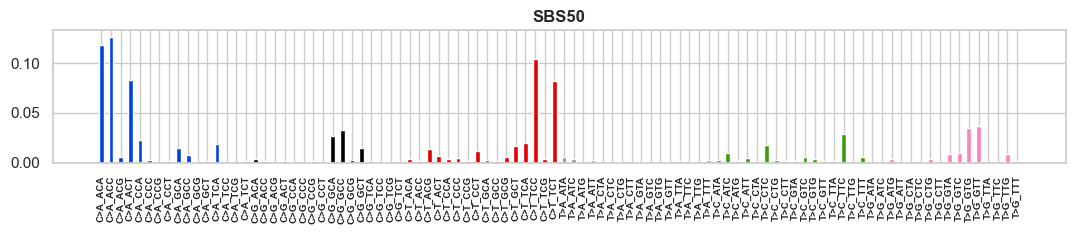

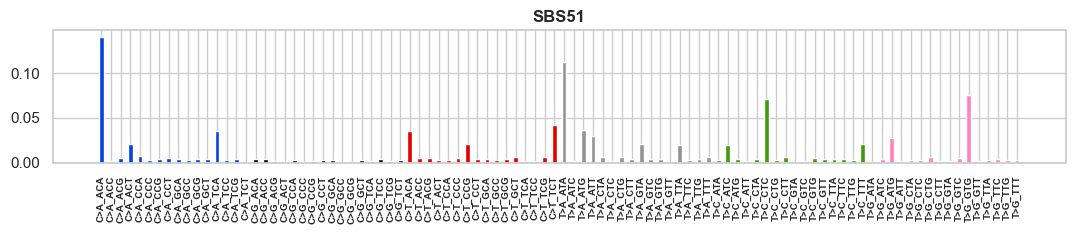

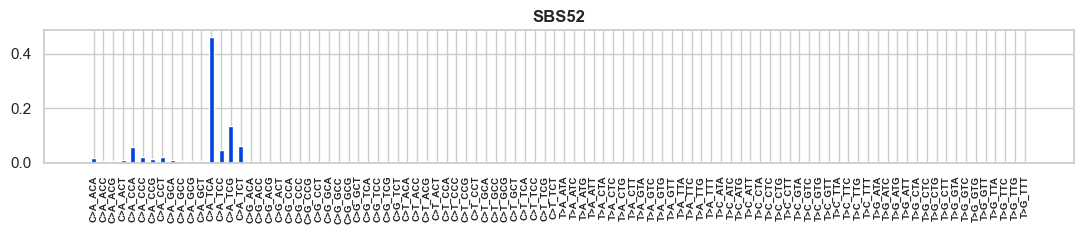

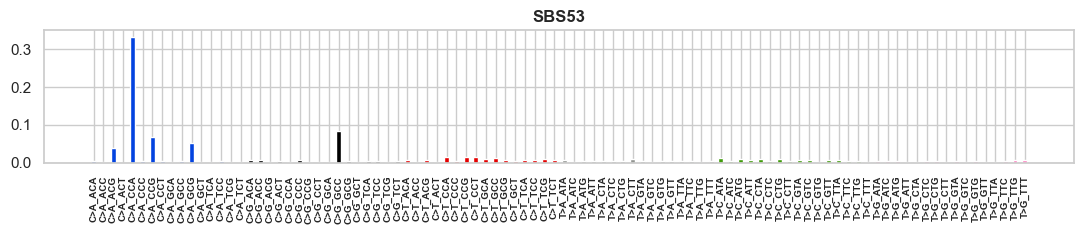

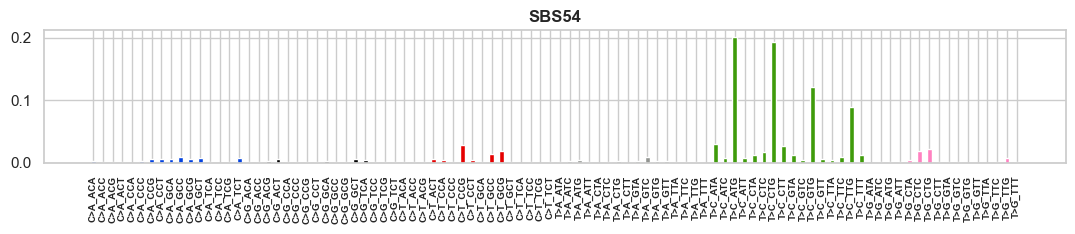

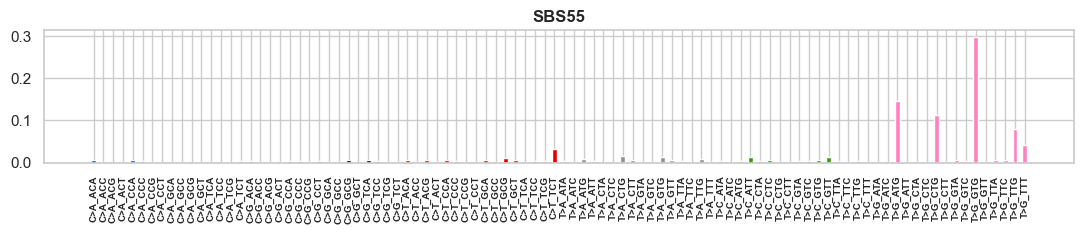

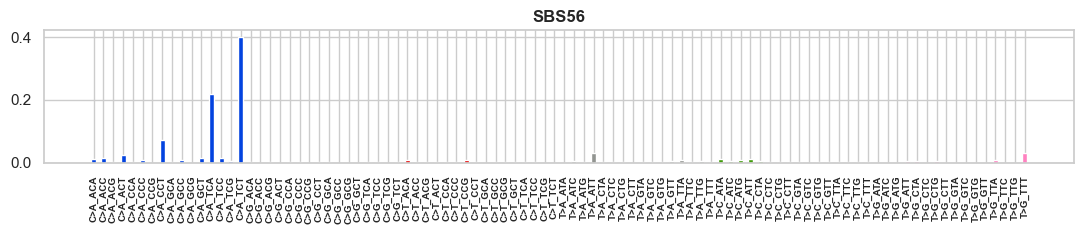

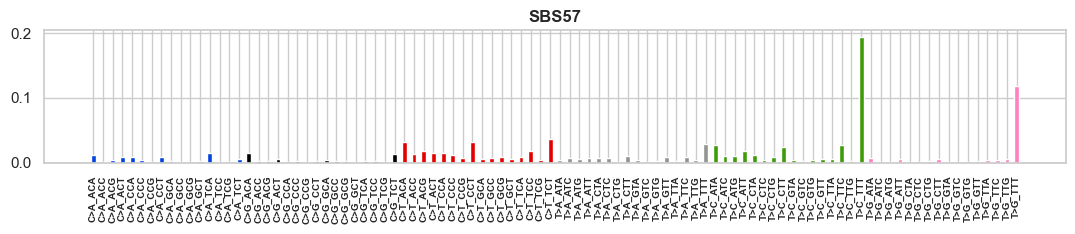

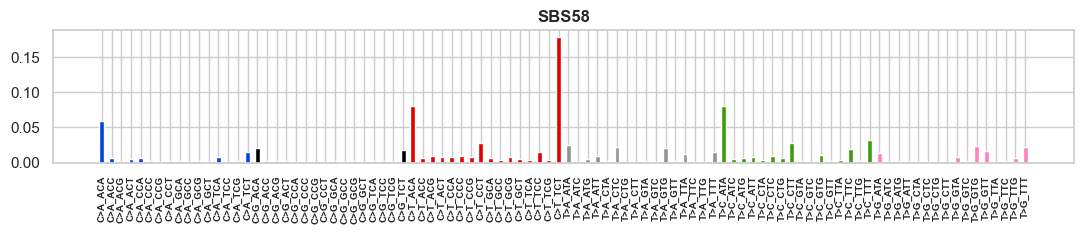

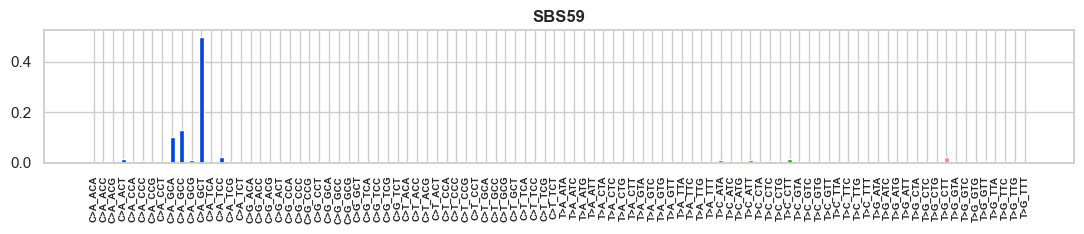

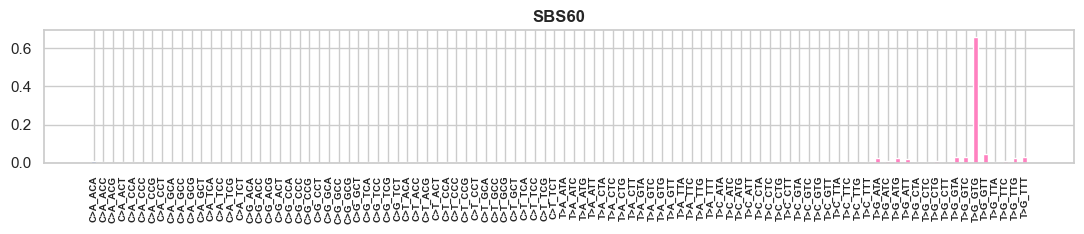

In [34]:
signatures = list(SBS_sig.columns[2:])

for s in signatures:
    sign = SBS_sig[s]
    plot_mutationchannels(sign, s)

#### Problem 1c: 
First, normalise mutation counts in the 96 channels for each individual sample so that they sum up to 1 to get sample specific mutations densities.  Then form the average of these densities for each cancer type and visualise the averages. 

Make this both at the 96 mutation channel level as well as summing over the context so that only 6 mutational channels remain, (as they are listed in channels6).

Can you see differences between cancer types? Use Figure 3 (and Figure 1 for the 6 channel version) from Alexandrov *et al.* to help look for cancer types that could look different when inspected via such average profiles. 

In [35]:
from sklearn import preprocessing

In [36]:
cancer_types = [col.split("::") for col in somaticMutations.columns[2:]]
unique_cancer_types = pd.unique([col[0] for col in cancer_types])

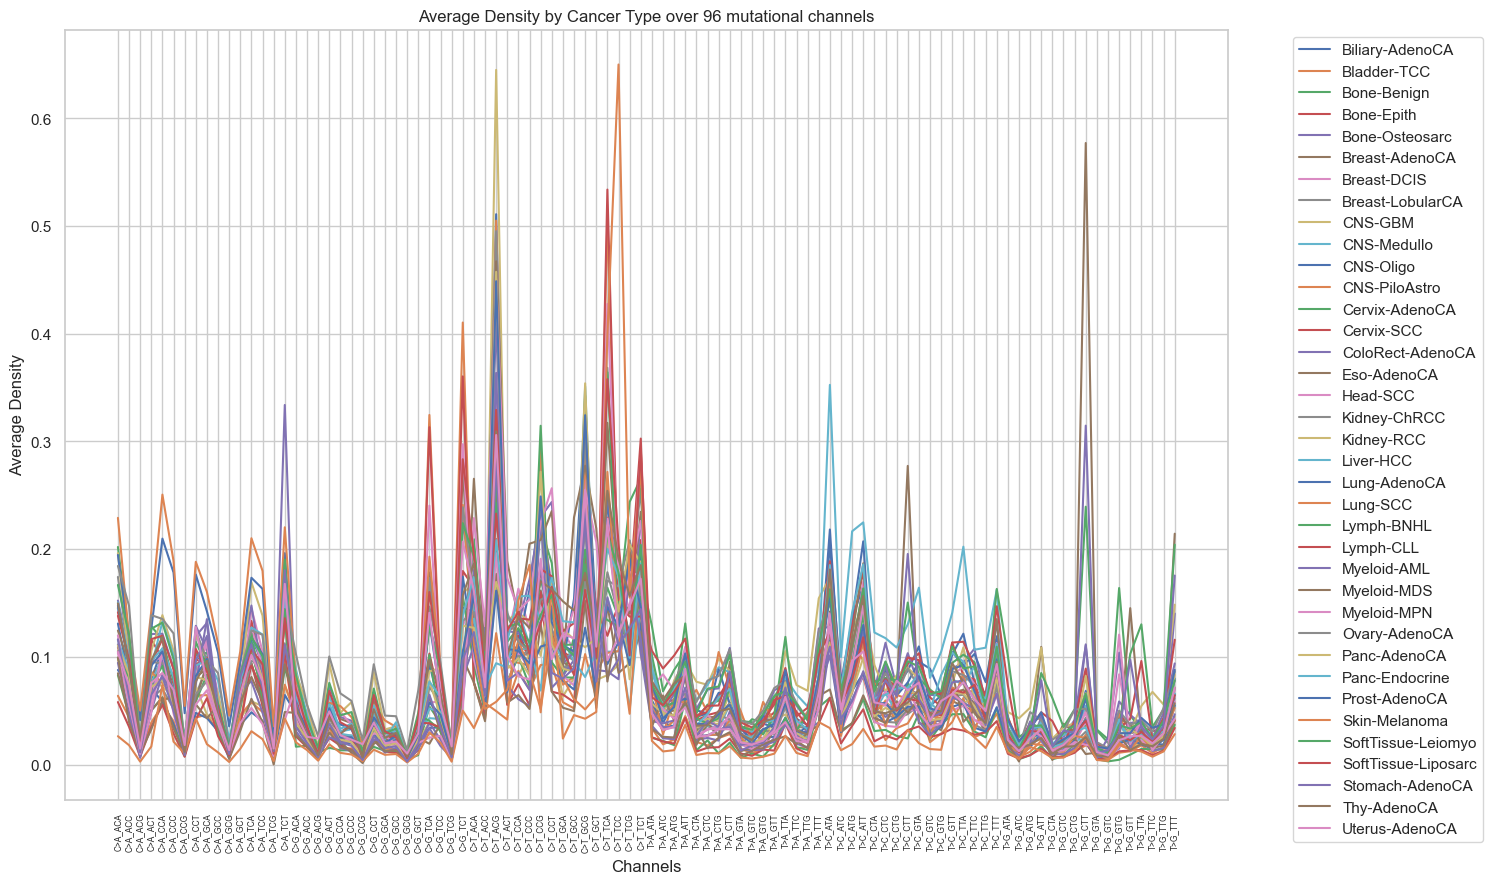

In [117]:
normalized = preprocessing.normalize(somaticMutations.iloc[:, 2:], axis=0)
normalized_df = pd.DataFrame(normalized, columns=somaticMutations.columns[2:])

averages = []

for type in unique_cancer_types:
    cols = normalized_df.loc[:,[col for col in normalized_df.columns if col.startswith(type + "::")]]
    type_average = cols.mean(axis=1)
    averages.append(type_average)

plt.figure(figsize=(15,10))
for i, t in enumerate(unique_cancer_types):
    plt.plot(averages[i], label = t)

plt.xlabel('Channels')
plt.ylabel('Average Density')
plt.title('Average Density by Cancer Type over 96 mutational channels')
plt.xticks(range(len(somaticMutations.index)), somaticMutations.index, fontsize=6, rotation="vertical")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

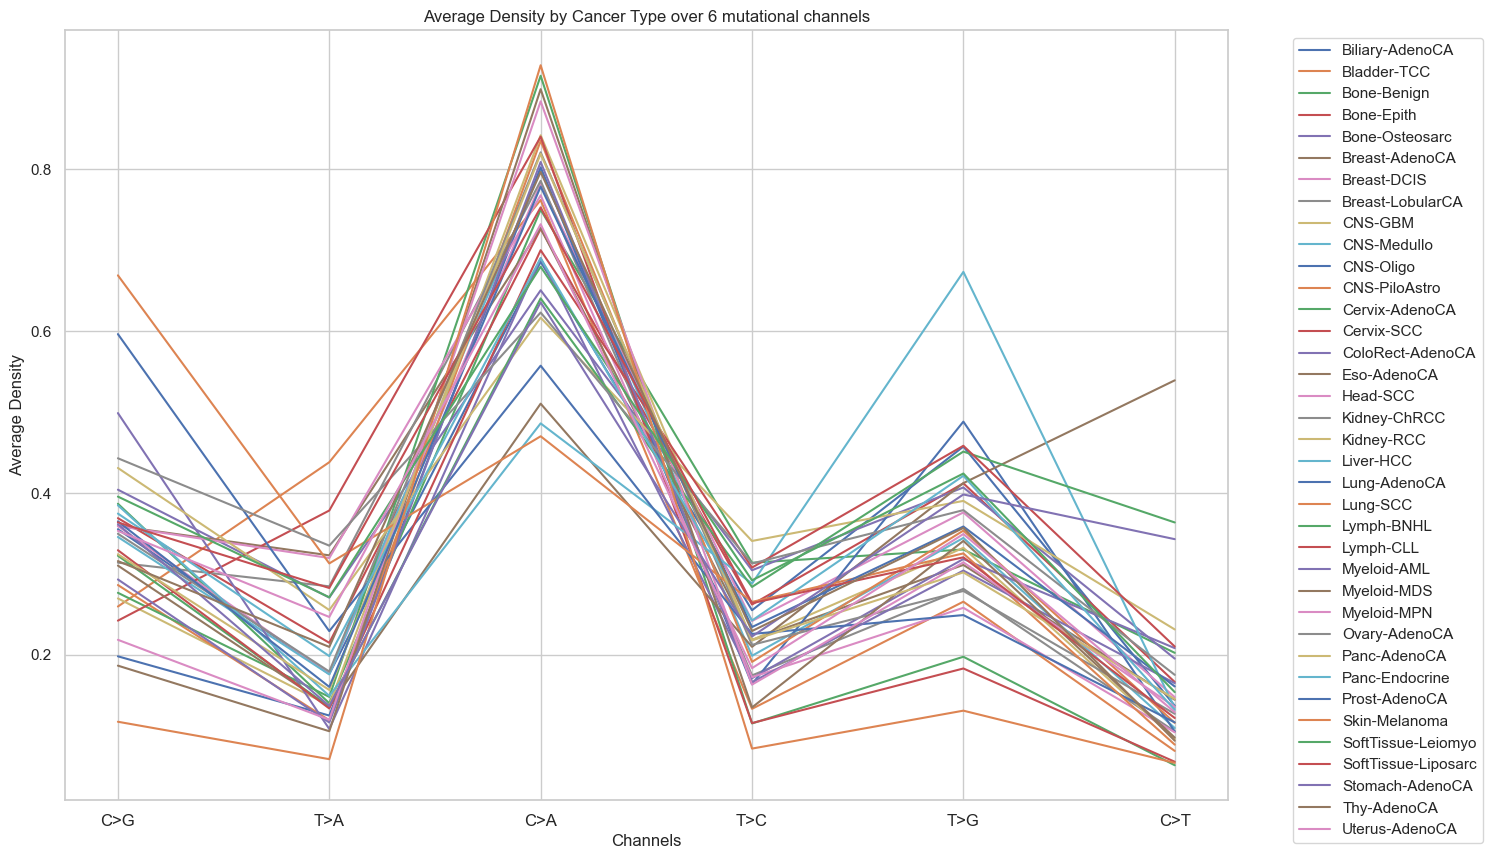

In [116]:
averages_6_channels = somaticMutations.groupby(somaticMutations.iloc[:, 0]).sum()

normalized_6 = preprocessing.normalize(averages_6_channels, axis=0)

norm_6_df = pd.DataFrame(normalized_6, columns=somaticMutations.columns[2:])


averages = []

for type in unique_cancer_types:
    cols = norm_6_df.loc[:,[col for col in norm_6_df.columns if col.startswith(type + "::")]]
    type_average = cols.mean(axis=1)
    averages.append(type_average)

plt.figure(figsize=(15,10))
for i, t in enumerate(unique_cancer_types):
    plt.plot(averages[i], label = t)

plt.xlabel('Channels')
plt.ylabel('Average Density')
plt.title('Average Density by Cancer Type over 6 mutational channels')
plt.xticks(range(len(channels6)), channels6, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Differences between cnacer types:

#### Problem 1d: 
Study now the signatures given. How different are they? Make a visualisation of all pairwise distances between the individual signatures. Use at least the following three metrics, cosine distance, Euclidian distance, Kullback-Leibler divergence. Use for visualisation heatmaps, c.f. Seaborn package, remember to add colour bars with a scale to all heat maps you plot. Make also figures where you plot all pairwise distances in an ordered way from most similar to least similar. Comment on how the change in the using distance/divergence measure affects this plot.  

### Problem 2: Generate simulated data <a id='Problem1'></a>

#### Problem 2a: 
Use the real somatic counts as an input to make a function that allows you to simulate data, given an input mutation count profile. Use three different noise models: Poisson, Negative Binomial and Gaussian. Make a data set for each noise model and use them in your analysis below. For now you can use the real counts of a sample as its "model" (we return to this in the second assignment). You just need to generate a simulated sample for each real sample using the three different noise models, in effect you re-sample the counts. Please note that for both Negative Binomial and Gaussian you also need to define variance (or overdispersion), please try a few different values and see how that affects the figures 2b.   

In [115]:
from scipy.stats import poisson, nbinom, norm

real_counts_subset = somaticMutations.iloc[:, 2:].to_numpy()

num_samples = real_counts_subset.shape[1]
num_mutations = real_counts_subset.shape[0]

simulated_data_poisson = np.zeros_like(real_counts_subset, dtype=int)
simulated_data_nb = np.zeros_like(real_counts_subset, dtype=int)
simulated_data_gaussian = np.zeros_like(real_counts_subset, dtype=float)

for i in range(num_samples):
    simulated_data_poisson[:, i] = np.random.poisson(real_counts_subset[:, i])

    # dispersion = 0.5
    # simulated_data_nb[:, i] = nbinom.rvs(dispersion, real_counts_subset[:, i])
    
    variance = 0.1 
    simulated_data_gaussian[:, i] = np.random.normal(real_counts_subset[:, i], np.sqrt(variance))


print(simulated_data_gaussian)
print(simulated_data_poisson)



[[269.249193   114.16563121 105.15048641 ...  97.17290095 249.85366692
  169.98518049]
 [148.26295919  55.832439    70.9652533  ...  78.23303798 188.13937719
  137.1666558 ]
 [ 24.96225741  13.20894946  13.65145833 ...  14.16917597  48.94064949
   31.8127583 ]
 ...
 [ 47.64603172  10.30196982   7.90488503 ...  16.4549763   91.53781221
   32.64932721]
 [ 63.16097799  31.48527065  15.06727332 ...  34.38350852 103.05925755
   42.15752893]
 [196.92621763  64.01153175  51.55848365 ... 105.65683476 270.28422237
   89.15214843]]
[[294 125  97 ...  91 256 156]
 [145  45  65 ...  82 186 133]
 [ 25  10  13 ...  13  59  28]
 ...
 [ 48  10   7 ...  12  82  30]
 [ 45  28  11 ...  45 104  37]
 [197  78  56 ... 113 275  96]]


#### Problem 2b:
Make a scatter plot of the input counts vs. simulated counts from the model (see for example in lecture slides L1) for each one of the noise models. Use log scale, comment on what you see? Is the noise additive or multiplicative?